In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Cleansing

## Check Missing Value

In [3]:
#check value type from each coumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#in TotalCharges there are anomaly, the datatype should int/float. we'll force wtih code to switch to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')


In [5]:
#check missing value 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are missing value, and we'll drop it

In [6]:
#drop missing value
df = df.dropna()

In [7]:
#check again for missing value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#swith to float 
df['TotalCharges'] = df['TotalCharges'].astype(float)

## Check Duplicated Values

In [9]:
#cek data dupikat
df.duplicated().sum()

0

no duplicate data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Data Understansding

## Statistical Summary

In [11]:
len(df.columns)

21

In [12]:
#separate categorical data and numerical data
nums = []
cats = []
for x in range(len(df.columns)):
    a = df.columns[x]
    if ((df.columns[x] == 'tenure') or 
        (df.columns[x] == 'MonthlyCharges') or 
        (df.columns[x] == 'TotalCharges')):
        nums.append(a)
    else:
        cats.append(a)
        
            

In [13]:
#describe statistical summary
df[nums].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



The mean and median on `tenure` are not so far indicated a symmetric distribution, but we'll check later in plot

as well as on `MonthlyCharges` the median and average difference is only 7

But on the median `TotalCharges` and the mean of the far difference, there seems to be *outlier*, let's check further with visualization

In [14]:
df[cats].describe()

,SeniorCitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
categoricals = df[cats]
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value

Observation:
* CustomerID berisikan data ID customer yang berisikan data unik.
* Gender berisikan data jenis kelamin, terdiri dari `Male` dan `Female`
* Pada kolom `partner, dependents,PhoneService, Churn, dan PaperlessBilling`  berisikan data boolean yang bernilai `Yes dan No`
* Pada kolom `MultipleLines,OnlineSeccurity, OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies` berisikan data kategori `yes, no dan No Internet Service` yang mana *no Internet Service* berarti tidak terjangkau jaringan Internet.
* Pada kolom `InternetService` berisikan data kategori layanan sambungan `FiberOptic(kabel fiber), DSL(kabel dengan voltage) dan no.`
* Pada kolom `contract` berisikan data kategori jenis kontrak. 
* Pada kolom `PaymentMethode` berisikan data katehgori dengan jenis pembayaran

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Univariate Analysis
## Detect Outlier with Boxplot

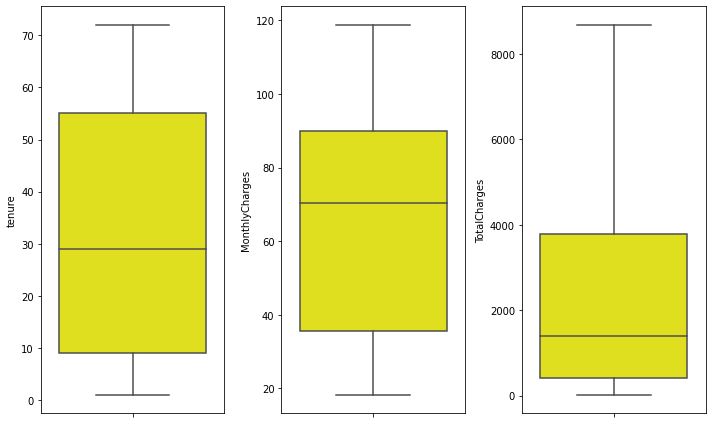

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[nums[i]], color='yellow')
    plt.tight_layout()

Tidak terdapat `outlier` pada data diatas, terlihat distribusi pada kolom `tenure`, `MonthluCharge` dan `TotalCharges` merata

## Knowing Distribution Form With KDE using histplot and distplot

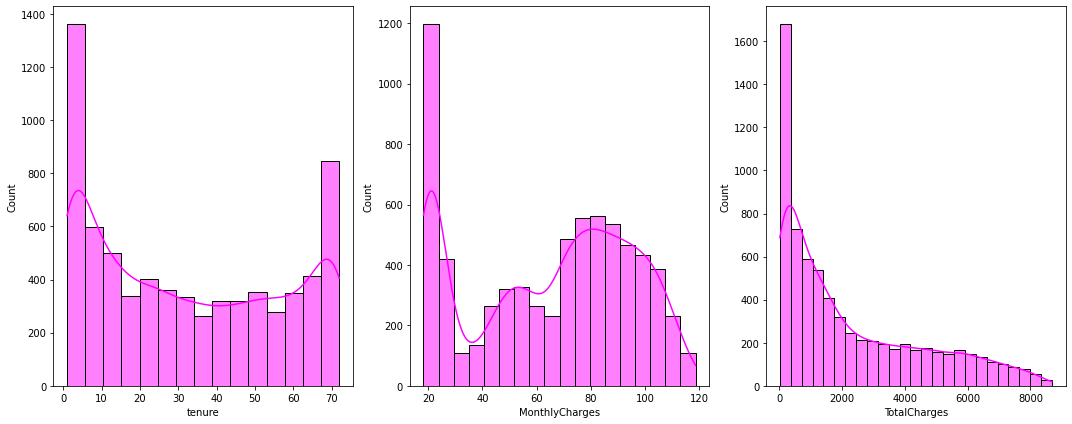

In [18]:
# # adjust the figure size for better readability
# plt.figure(figsize=(10,6))

# # plotting
# features = nums
# for i in range(0, len(features)):
#     plt.subplot(1, len(features), i+1)
#     sns.displot(y=df[features[i]], color='yellow')
#     plt.tight_layout()
    
# adjust the figure size for better readability
plt.figure(figsize=(15,6))

features = nums
for i in range(0, len(features)):
    # plt.subplot(2, len(features)//2 + 1, i+1)
    plt.subplot(1, len(features), i+1)
    sns.histplot(x=df[features[i]],kde=True, color='magenta')
    plt.xlabel(features[i])
    plt.tight_layout()

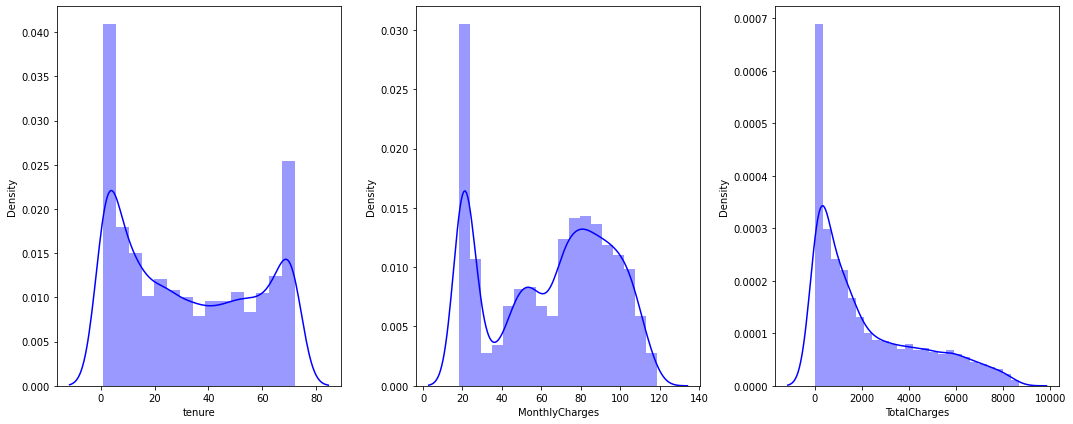

In [19]:
plt.figure(figsize=(15,6))
# plotting numerical columns
features = nums
for i in range(0, len(features)):
    # plt.subplot(2, len(features)//2 + 1, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]],kde=True, color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

terlihat pada `TotalCharge` menunjukan Positif Skewed, sedangkan pada `tenure` menujukan bimodal yang mana ada 2 peak pada sebaran datanya. sehingga jika terjadi missing value alangkah baiknya menggunakan modus untuk menghindari rentang nilai yang tinggi.

## countplot categorical column

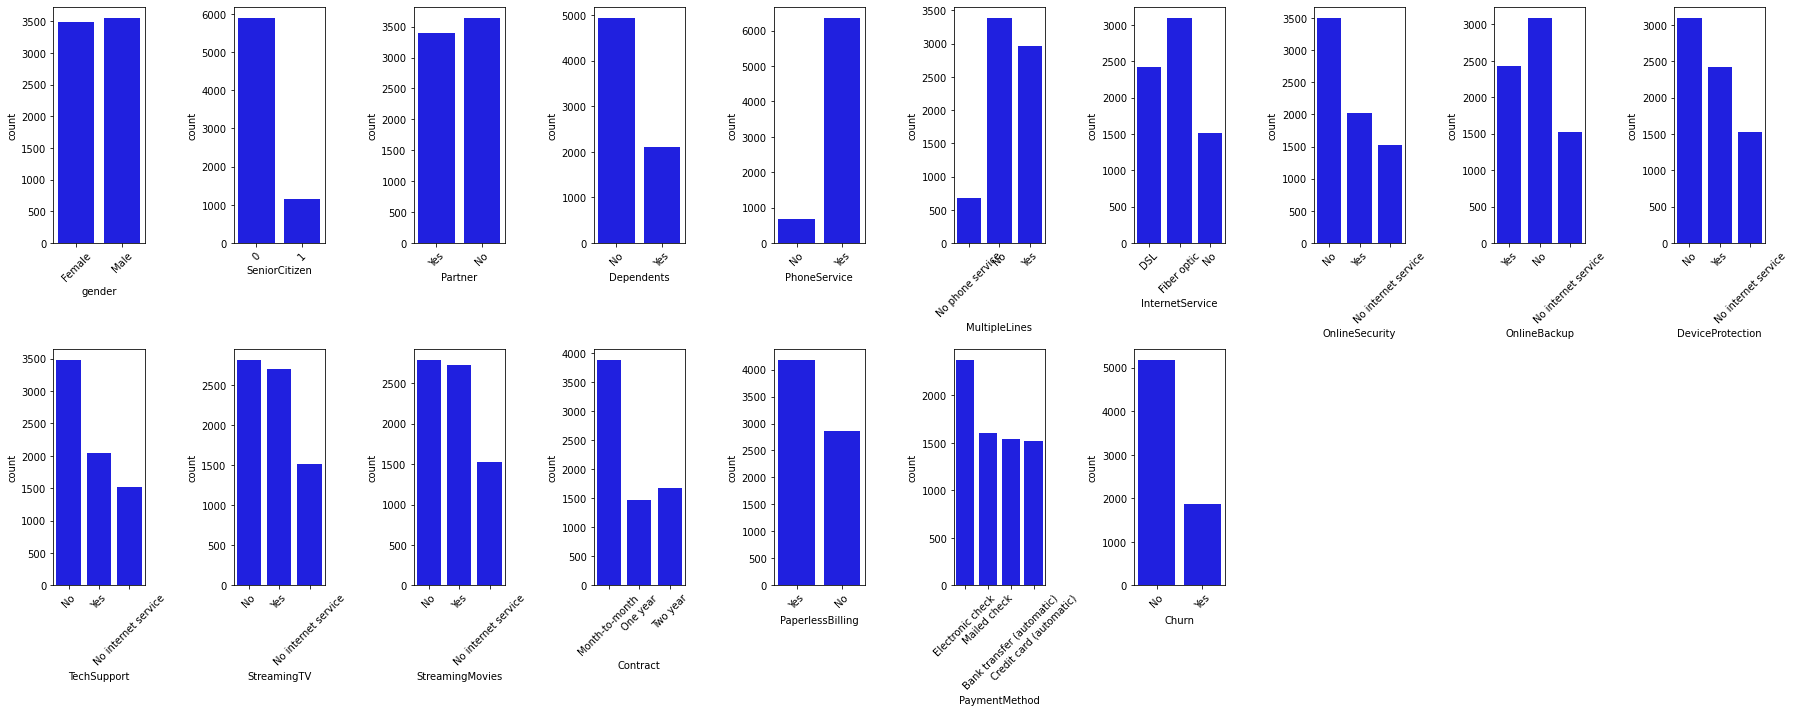

In [20]:
plt.figure(figsize=(25,10))
#plotting countplot in categoreical columns
features = cats
#CustomerID tidak dilooping karena valuenya unique, tidak sama satu sama lain
for i in range(1, len(features)):
    plt.subplot(2, len(features)//2 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='blue')
    plt.xticks(rotation=45)
    plt.xlabel(features[i])
    plt.tight_layout()

bisa kita lihat sebaran data kategorik diatas, pada `gender` pria dan wanita terlihat hampir merata,
* pada `SeniorCitizen` yang lebih muda lebih banyak dibandingkan yang senior,
* pada `Partner` sebaran data hampir merata,
* pada `dependents` yang no lebih banyak dibandingkan yes,
* pada `PhoneServices` yang yes lebih banyak dibandingkan yang no,
* pada `MultipleLines` yang tidak menggunakan layanan telp lebih sedikit,
* pada `InternetServices` yang menggunakan `FiberOptic` lebih banyak dari `DSL`, yang tanpa menggunakan layanan internet  hampir setengahnya dari yang menggunakan `FiberOptic`
* pada `OnlineSecurity` dan `OnlineBackup` yang menggunakan layanan tersebut lebih sedikit daripada yang tidak menggunakan layanan tersebut,
* pada `DeviceProtection`, dan `TechSupport` yang menggunakan layanan tersebut lebih sedikit daripada yang tidak menggunakan dan tidak punya layanan internet.
* pada `StreamingTv` dan `StreamingMovies` yang menggunakan dan yang tidak hampir sama, tetapi yang tidak menggunakan layanan internet hampir setengahnya dari yang menggunakan layanan tsb.
* pada `Contract` yang mempunyai kontrak `month-to-month` lebih banyak daripada yang kontrak tahunan.
* pada `PapperlessBilling` yang menggunakan kertas untuk bukti pembayaran lebih banyak daripada yang tidak.
* pada `PaymentMethod` lebih banyak yang menggunakan `ElektronikCheck` dibandingkan dengan metode pembayaran lainnya.
* pada `Churn` masih banyak yang berlangganan, tetapi hampir 1/3  dari data yang berlangganan ada juga yang berhenti berlangganan.

# Multivariate Analysis

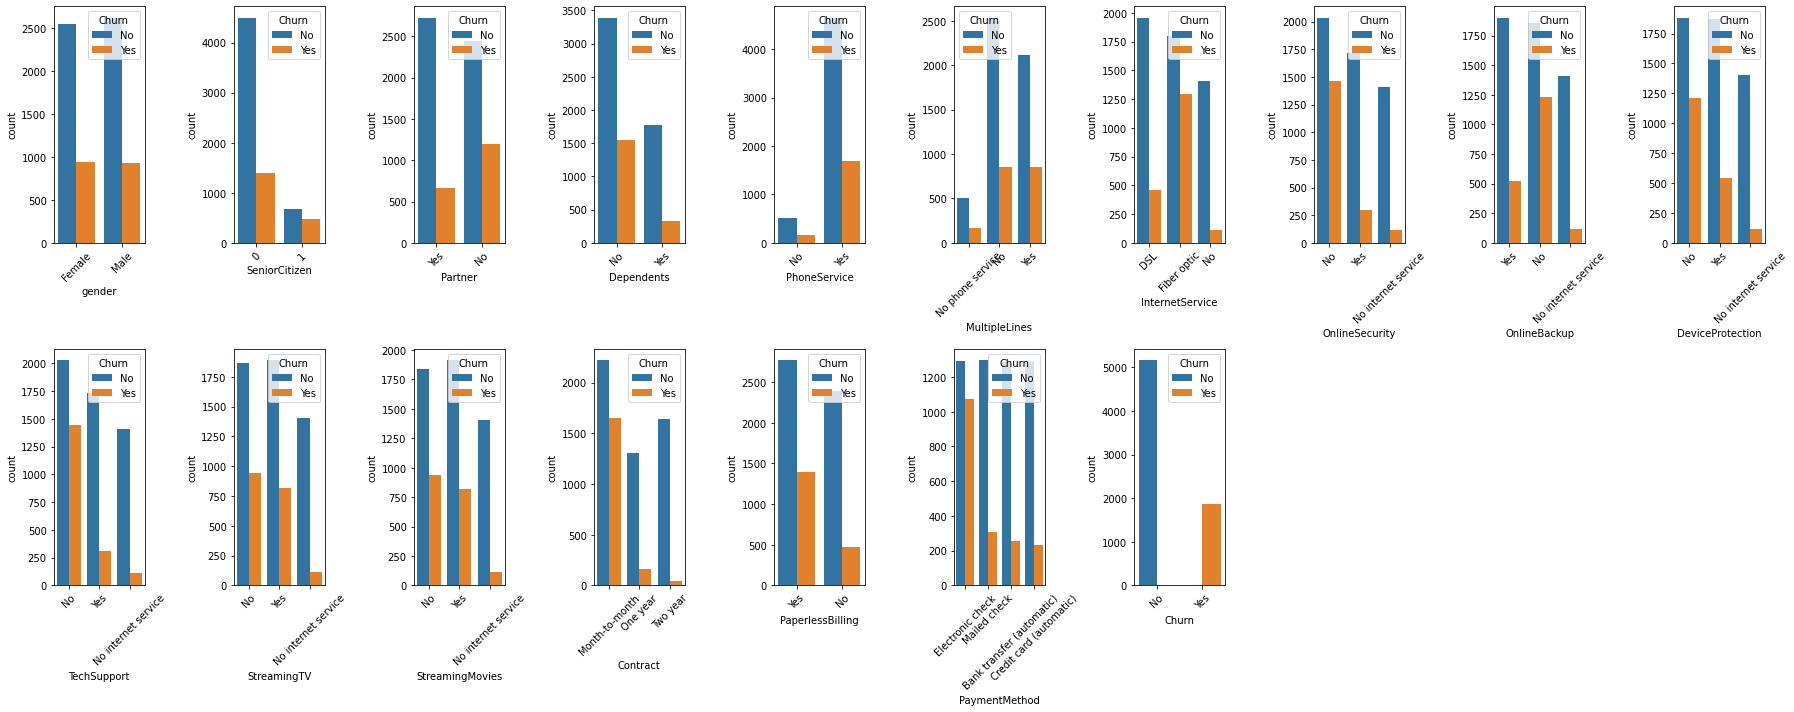

In [21]:
#plotting with looping in categorical columns
plt.figure(figsize=(25,10))

features = cats
#CustomerID tidak dilooping karena valuenya unique, tidak sama satu sama lain
for i in range(1, len(features)):
    plt.subplot(2, len(features)//2 + 1, i)
    # plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], hue=df['Churn'])
    plt.xticks(rotation=45)
    plt.xlabel(features[i])
    plt.tight_layout()

kita bisa lihat cutomer churn lebih banyak yang setia dibanding dengan yang berhenti berlangganan.
* Pada `gender` terlihat perbandingan pria dan wanita hampir seimbang.
* Pada `SeniorCitizen` masih banyak yang berlangganan dibanding yang tidak, sebaran data yang masih mudah lebih banyak dibanding yang senior.
* Pada `Partner` yang tidak mempunyai pasangan lebih banyak yang berhenti berlangganan dibanding dengan yang mempunyai pasangan.
* Pada `PhoneService` mungkin perlu adanya tindakan lebih lanjut dikarenakan yang mempunyai `PhoneService` banyak yang berhenti berlangganan dibandingkan dengan yang tidak mempunyai `PhoneService`.
* Pada `MultipleLines` yang berhenti berlangganan hampir setengahnya, baik pada yang memiliki banyak saluran ataupun tidak.
* Pada `InternetService` yang menggunakan `FiberOptic` banyak yang berhenti berlangganan.
* Pada `OnlineSecurity` pelanggan yang tidak menerapkan keamanan pada sambungannya lebih banyak yang berhenti berlangganan.
* Pada `OnlineBackup` yang tidak menerapkan `Backup` secara online lebih banyak yang berhenti berlangganan dibandingan dengan pelanggan yang menerapkan OnlineBackup.
* Begitupun pada `DeviceProtection`, pelanggan yang tidak menerapkan proteksi pada `Device` nya lebih banyak yang berhenti berlangganan.
* Pada `TechSupport` juga yang tidak mempunyai `TechSupport` lebih banyak yang berhenti belangganan.
* Pada `StreamingTV` pelanggan dengan yang menerapkan layanan `streamingTV` hampir merata yang berhenti dengan yang tidak menerapkan layanan `streamingTV`. tetapi yang masih berlangganan pun masih banyak.
* Pada `Contract` yang berhenti berlangganan kebanyakan pada kontrak yang perbulan dibandingan dengan kontrak tahunan.
* Pada `PaperlessBilling` untuk perbandingan yang mendapatkan informasi pembayaran dengan menggunakan kertas 1:2, dimana hampir setengahnya berhenti berlangganan, mungkin harus dianalisis lebih lanjut apa penyebanya.
* Pada `PaymentMethod` yang menggunakan pembayaran elektronik banyak yang berhenti berlangganan dibandingakan dengan pembayaran lain, mungkin perlu tindak lanjut apa penyebabya, ditakutkan kebanyakan menggunakan layanan autodebet ditakutkan customer lupa akan tagihan.
* pada kolom `Churn` perbandingan dari grafik terliha 1:3.


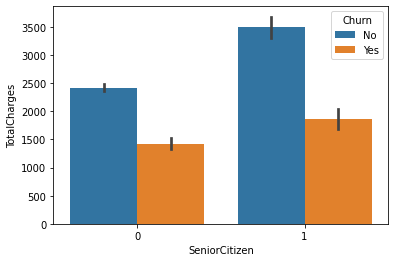

In [22]:
#plotting with barplot
sns.barplot(data=df,x='SeniorCitizen',y='TotalCharges',hue='Churn')
plt.show()

kita bisa lihat warga senior lebih banyak mengeluarkan uang dibandingkan dengan warga yang muda. Dan hampir setengahnya dari warga senior berhenti berlangganan.

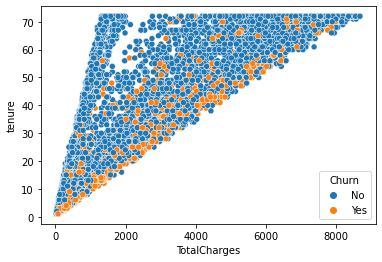

In [23]:
#plotting with scatterplot
sns.scatterplot(data=df, x='TotalCharges',y='tenure',hue='Churn')
plt.show()

terlihat sebaran data yang sedikit mengeluarkan biaya dari TotalCharges dan Tenure yang sedikit lebih banyak berhenti berlangganan dibanding dengan pelanggan yang setia. tetapi ada juga beberapa dengan jumlah Tenure banyak dan TotalCharge yang banyak lebih berhenti berlangganan. 

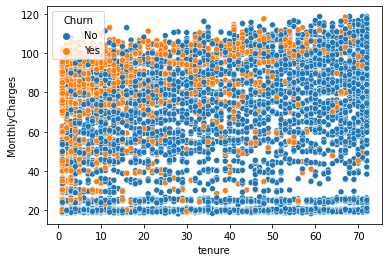

In [24]:
sns.scatterplot(data=df, x='tenure',y='MonthlyCharges',hue='Churn')
plt.show()

terlihat sebaran data yang sedikit mengeluarkan biaya dari TotalCharges dan Tenure yang sedikit lebih banyak berhenti kita perjelas lagi dengan monthlyCharges dengan tenure, sebaran data yang berhenti berlangganan terletak merata pada tenure, tetapi menumpuk pada tenure dibawah 30, tetapi sebaran data pada TotalCharge agak mahal banyak yang berhenti berlangganan dibanding dengan bulanan yang murah.

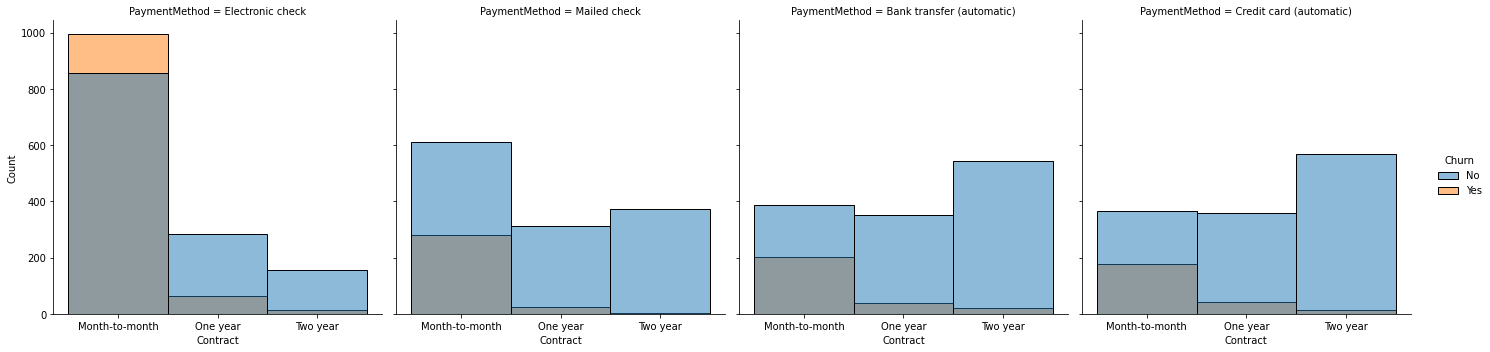

In [25]:
#plotting with distribution plot
sns.displot(data=df,x='Contract',col='PaymentMethod',hue='Churn')

In [26]:
#describe with correlation
korelasi = df.corr()
korelasi

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

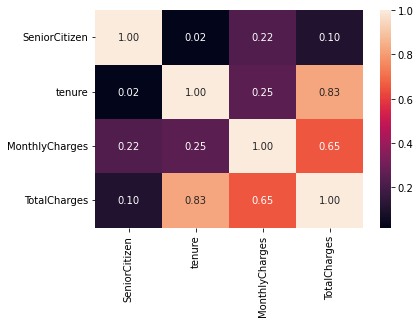

In [27]:
#plotting with heatmap
sns.heatmap(korelasi, annot=True, fmt='.2f')

bisa kita lihat `tenure` dan `TotalCharges` memiliki arah distribusi yang berkorelasi tinggi dibandingkan dengan kolom yang lain.

In [28]:
#replace value churn from object to boolean int
df['Churn'].replace(('Yes','No'),(1,0),inplace=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

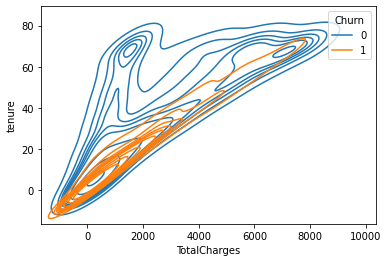

In [29]:
#plotting with kdeplot
sns.kdeplot(data=df,
           x='TotalCharges',
           y='tenure',
           hue='Churn',
           kind='kde')

distribusi Churn yang bernilai 1 (berhenti berlangganan) berwarna orange dan terlihat menumpuk di area bawah

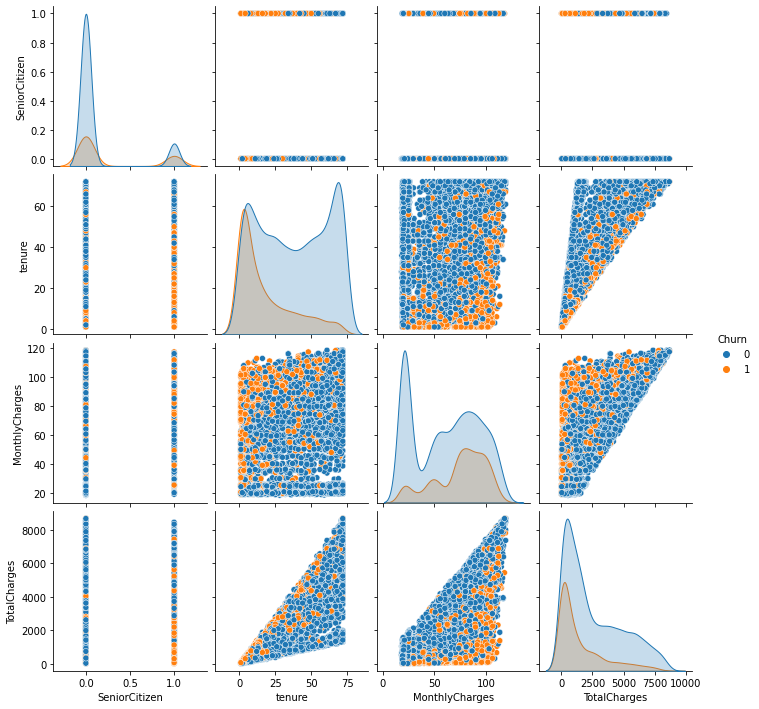

In [30]:
sns.pairplot(df,hue='Churn');

we can see the distribution plot for each columns

# EDA Question
* Who are the top 10 Customers who spend more money for Telco Company ?
* Who are the top 10 `Churn Customers` who spend more money for Telco Company ?
* Who are the top 10 `Customers not churn` who spend more money for Telco Company ?
* How many customers who `curn` and `not churn`
* how much money is made from `internet services`? show turnover by `category`
* How much average `tenure` and amount month who used our service, show by `Churn, MultipleLines, PhoneService, and InternetService`
* Show `statistical summary` from our service by `TotalCharges` !
* How many customers who used `our service` ? show per each `category`
* Show service on `InternetService` who used any features on `services` and `still subscribe`.
* How many customers who used `InternetService` per each `category` and `still subscribe` ?
* How many customers who used `PhoneService` per each `category` and `still subscribe`?
* How many customers who pay per each PaymentMethod ?





In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Who are the top 10 Customers who spend more money for Telco Company ?

In [33]:
# Top 10 products with the most transactions sorted by TotalCharges
top10_spend = df.sort_values(by=['TotalCharges'], ascending=False)


In [34]:
#showing top 10 spending who more spend money.
lim = ['customerID','gender','SeniorCitizen','tenure','MultipleLines','PhoneService','InternetService','StreamingTV','Contract','MonthlyCharges','TotalCharges','Churn']
top10_spend[lim].head(10)

,customerID,gender,SeniorCitizen,tenure,MultipleLines,PhoneService,InternetService,StreamingTV,Contract,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,72,Yes,Yes,Fiber optic,Yes,One year,117.80,8684.80,1
4586,7569-NMZYQ,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,118.75,8672.45,0
6768,9739-JLPQJ,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,117.50,8670.10,0
5347,9788-HNGUT,Male,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.95,8594.40,0
2187,8879-XUAHX,Male,0,71,Yes,Yes,Fiber optic,Yes,Two year,116.25,8564.75,0
6118,9924-JPRMC,Male,0,72,Yes,Yes,Fiber optic,Yes,Two year,118.20,8547.15,0
5558,0675-NCDYU,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.40,8543.25,0
2368,6650-BWFRT,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,117.15,8529.50,0
2603,0164-APGRB,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,114.90,8496.70,0
2025,1488-PBLJN,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.85,8477.70,0


and from thats data we can see the customers use `InternetService` FiberOptic and most `Contract` of them is two year. and 1 people in top 10 who churn

## Who are the top 10 `Churn Customers` who spend more money for Telco Company ?

In [35]:
#split into cust churn and not churn
cust_churn = df[df['Churn']==1]
cust_not_churn = df[df['Churn']==0]

#showing top10 transaction who spend more money and churn is True
cchurn = cust_churn.sort_values(by=['TotalCharges'], ascending=False)
cchurn[lim].head(10)

,customerID,gender,SeniorCitizen,tenure,MultipleLines,PhoneService,InternetService,StreamingTV,Contract,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,72,Yes,Yes,Fiber optic,Yes,One year,117.80,8684.80,1
1306,0201-OAMXR,Female,0,70,Yes,Yes,Fiber optic,Yes,One year,115.55,8127.60,1
3890,3886-CERTZ,Female,0,72,Yes,Yes,Fiber optic,Yes,One year,109.25,8109.80,1
6537,1444-VVSGW,Male,0,70,Yes,Yes,Fiber optic,Yes,One year,115.65,7968.85,1
5581,5271-YNWVR,Male,0,68,Yes,Yes,Fiber optic,Yes,Two year,113.15,7856.00,1
5127,8199-ZLLSA,Male,0,67,Yes,Yes,Fiber optic,Yes,One year,118.35,7804.15,1
6289,9053-JZFKV,Male,0,67,Yes,Yes,Fiber optic,Yes,Two year,116.20,7752.30,1
6038,1555-DJEQW,Female,0,70,Yes,Yes,Fiber optic,Yes,Two year,114.20,7723.90,1
6398,3259-FDWOY,Male,0,71,Yes,Yes,Fiber optic,Yes,Two year,106.00,7723.70,1
3040,7317-GGVPB,Male,0,71,Yes,Yes,Fiber optic,Yes,Two year,108.60,7690.90,1


## Who are the top 10 `Customers not churn` who spend more money for Telco Company ?

In [36]:
#showing top10 transaction who spend more money and churn is False
cnchurn = cust_not_churn.sort_values(by=['TotalCharges'], ascending=False)
cnchurn[lim].head(10)

,customerID,gender,SeniorCitizen,tenure,MultipleLines,PhoneService,InternetService,StreamingTV,Contract,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,118.75,8672.45,0
6768,9739-JLPQJ,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,117.50,8670.10,0
5347,9788-HNGUT,Male,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.95,8594.40,0
2187,8879-XUAHX,Male,0,71,Yes,Yes,Fiber optic,Yes,Two year,116.25,8564.75,0
6118,9924-JPRMC,Male,0,72,Yes,Yes,Fiber optic,Yes,Two year,118.20,8547.15,0
5558,0675-NCDYU,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.40,8543.25,0
2368,6650-BWFRT,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,117.15,8529.50,0
2603,0164-APGRB,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,114.90,8496.70,0
2025,1488-PBLJN,Female,0,72,Yes,Yes,Fiber optic,Yes,Two year,116.85,8477.70,0
2115,8984-HPEMB,Female,0,71,Yes,Yes,Fiber optic,Yes,Two year,118.65,8477.60,0


## How many customers who `curn` and `not churn`

In [37]:
#showing how many customers not churn and churn
print('customer who churn',len(cust_churn))
print('customer who not churn',len(cust_not_churn))

customer who churn 1869
customer who not churn 5163


## How much money is made from internet services? show turnover by category

In [38]:
#showing omset from internetService
inet_serv = (df.groupby(['InternetService'])
            .agg(total_omset=('TotalCharges','sum'))
            .reset_index()
            )

inet_serv

,InternetService,total_omset
0,DSL,5121410.85
1,Fiber optic,9923622.95
2,No,1011134.90


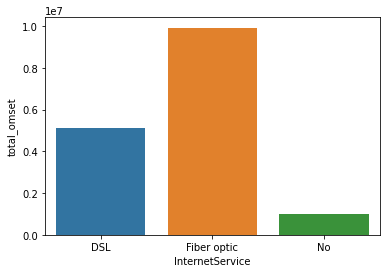

In [39]:
#figure out with plot
sns.barplot(data=inet_serv, x='InternetService',y='total_omset');

top omset from the service is from `fiber optic`

## How much average tenure and amount month who used our service, show by Churn, MultipleLines, PhoneService, and InternetService 

In [40]:
dist_tenure = (df.groupby(['Churn','MultipleLines','PhoneService','InternetService'])
             .agg(avgtenure=('tenure','mean'),
                  cust_count=('tenure','count'),
                  ten_sum=('tenure','sum')))
    
dist_tenure = dist_tenure.reset_index()
dist_tenure

,Churn,MultipleLines,PhoneService,InternetService,avgtenure,cust_count,ten_sum
0,0,No,Yes,DSL,29.298436,831,24347
1,0,No,Yes,Fiber optic,29.560510,628,18564
2,0,No,Yes,No,27.776230,1077,29915
3,0,No phone service,No,DSL,37.162745,510,18953
4,0,Yes,Yes,DSL,48.188312,616,29684
5,0,Yes,Yes,Fiber optic,48.808711,1171,57155
6,0,Yes,Yes,No,47.784848,330,15769
7,1,No,Yes,DSL,9.717593,216,2099
8,1,No,Yes,Fiber optic,11.707547,530,6205
9,1,No,Yes,No,6.669903,103,687


we'll focused to churn customers `tenure`, average month who used `Fiber Optic` is 26 and 11. maybe we must give customers discount or `offer` to keep subscribe at month 26 and 11. Even so on DSL

## Show statistical summary from our service by TotalCharges !

In [41]:
piv_multi = pd.pivot_table(df,
               index=['MultipleLines','InternetService','PhoneService'], 
               values=('TotalCharges'),
               aggfunc=('mean','median','min','max','count','sum')).reset_index()
piv_multi

,MultipleLines,InternetService,PhoneService,count,max,mean,median,min,sum
0,No,DSL,Yes,1047,6328.70,1642.657116,1023.900,42.90,1719862.00
1,No,Fiber optic,Yes,1158,8033.10,1933.581822,1150.600,68.50,2239087.75
2,No,No,Yes,1180,1567.00,517.148432,392.425,18.80,610235.15
3,No phone service,DSL,No,680,4919.70,1500.433750,1153.800,23.45,1020294.95
4,Yes,DSL,Yes,689,6859.05,3456.101451,3593.800,49.80,2381253.90
5,Yes,Fiber optic,Yes,1938,8684.80,3965.188442,3989.550,72.10,7684535.20
6,Yes,No,Yes,340,2006.95,1179.116912,1294.950,24.00,400899.75


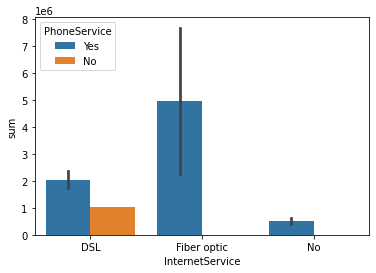

In [42]:
sns.barplot(data=piv_multi,y='sum',x='InternetService',hue='PhoneService');

## How many customers who used our service ? show per each category

In [43]:
#show count cust per each category on service
count_cust = pd.pivot_table(df,
               index=['MultipleLines','InternetService','PhoneService'], 
               values=('TotalCharges'),
               aggfunc=('count')).reset_index()
count_cust


,MultipleLines,InternetService,PhoneService,TotalCharges
0,No,DSL,Yes,1047
1,No,Fiber optic,Yes,1158
2,No,No,Yes,1180
3,No phone service,DSL,No,680
4,Yes,DSL,Yes,689
5,Yes,Fiber optic,Yes,1938
6,Yes,No,Yes,340


## Show service on InternetService who used any features on services and still subscribe.

In [44]:
#make a var contain (tilde no) in columns InternetService
inet_gr = df[~(df['InternetService']=='No')]

In [45]:
#check unique values
inet_gr['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [46]:
#check to make sure on the column not contain 'No internet service'
inet_gr['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
#check in original dataframe
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [48]:
#check length to make sure values on columns is same
print(len(inet_gr.InternetService))
print(len(df[~(df['OnlineSecurity']=='No internet service')]))
print(len(df[~(df['OnlineSecurity']=='No internet service')]))
print(len(df[~(df['OnlineBackup']=='No internet service')]))
print(len(df[~(df['DeviceProtection']=='No internet service')]))
print(len(df[~(df['StreamingMovies']=='No internet service')]))
print(len(df[~(df['StreamingTV']=='No internet service')]))



5512
5512
5512
5512
5512
5512
5512


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [50]:
#showing used service on Internet Service
inet_service = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
inet_serviceschurn = inet_gr[inet_gr['Churn']==0]
inet_serviceschurn[inet_service].head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,DSL,No,Yes,No,No,No,No,0
1,DSL,Yes,No,Yes,No,No,No,0
3,DSL,Yes,No,Yes,Yes,No,No,0
6,Fiber optic,No,Yes,No,No,Yes,No,0
7,DSL,Yes,No,No,No,No,No,0


## How many customers who used InternetService per each category and still subscribe?

In [51]:
gr_serv = inet_serviceschurn.groupby(['InternetService',]).agg(
    count_serv = ('InternetService','count')
).reset_index()
gr_serv

,InternetService,count_serv
0,DSL,1957
1,Fiber optic,1799


## How many customers who used PhoneService per each category and still subscribe?

In [52]:
gr_phoneserv = inet_serviceschurn.groupby(['PhoneService',]).agg(
    count_serv = ('PhoneService','count')
).reset_index()
gr_phoneserv

,PhoneService,count_serv
0,No,510
1,Yes,3246


## How many customers who pay per each PaymentMethode ?

In [53]:
#show count paymentMethod per each category
dist_contract = (pd.pivot_table(df,
                                index=['PaymentMethod'],
                                values='TotalCharges',
                                aggfunc=('count')).reset_index()
                )
dist_contract

,PaymentMethod,TotalCharges
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
